# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Read the README.md file,
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [61]:
# Import your libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

## What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Perform a minimum of 4 Feature Extraction and Engineering techniques
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

Just one last piece of advice, take a moment to explore the data, remember this dataset contains two files: **train** and **test**. You will find both files in `data` folder. The **test** files contains the data you will predict for, therefore it does not include the labels.
Use the **train** dataset as you wish, but don't forget to split it into **train** and **test** again so you can evaluate your models. Just be sure to train it again with the whole data before predicting.
We have also included a **sample submission** which is of the exact shape and format you must use when evaluating your predictions against the groundtruth through the `APIla-bible`. It won't work unless it is the exact same shape. 



#### Train dataset

In [2]:
train_dataset = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [3]:
display(train_dataset.head(3))
print(train_dataset.shape)

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus


(12017, 11)


In [4]:
train_data = train_dataset[['0','1','2','3','4','5','6','7','8','9']]

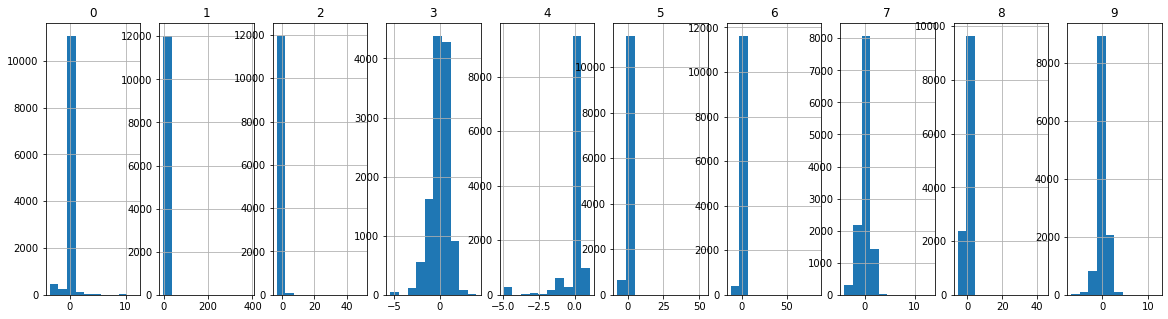

In [5]:
plt.figure(figsize=(20,5))
for i,a in enumerate(train_data.columns):
    plt.subplot(1,len(train_data.columns), i + 1)
    train_data[a].hist()
    plt.title(f"{i}")

In [6]:
train_dataset['1'].max()

386.0

In [7]:
X = train_data
y = train_dataset['10']
display(X.head(), y.head())

,0,1,2,3,4,5,6,7,8,9
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030


0       Marcus
1      Clarius
2    Philippus
3    Philippus
4    Philippus
Name: 10, dtype: object

#### Test dataset


In [10]:
test_dataset = pd.read_csv('../data/test_dataset.csv', index_col=0)

In [11]:
display(test_dataset.head(3))
print(test_dataset.shape)

,0,1,2,3,4,5,6,7,8,9
0,-0.017834,0.132725,0.125378,1.357345,0.261718,0.190314,0.182426,0.445253,-0.715453,0.189796
1,-0.202992,-0.000745,-3.210528,-0.527256,0.082961,0.771662,0.144676,0.098572,0.251173,0.745333
2,1.019049,0.211237,-0.155578,-0.311855,0.261718,0.107265,0.484429,0.339303,-0.310094,-0.049630


(8012, 10)


#### Sample submission

In [12]:
sample_submission = pd.read_csv('../data/sample_submission.csv', header=None, index_col=0)

In [13]:
sample_submission.head()

,1
0,
0,Philippus
1,Ubuntius
2,Esequlius
3,Coronavirucus
4,Philippus


`Keep calm and code on!`

# Challenge - train your models, make the best prediction

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 1. Naive Bayes

In [72]:
# Trainig the model
nbmodel = GaussianNB()
nbmodel.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [73]:
# Testing the model 
nby_pred = nbmodel.predict(X_test)

In [75]:
# Meassuring the model
print(classification_report(y_test,nby_pred))

               precision    recall  f1-score   support

      Clarius       0.31      0.37      0.34       443
Coronavirucus       0.63      0.63      0.63       214
    Esequlius       0.16      0.20      0.17        96
       Marcus       0.62      0.23      0.34      1020
     Mongucus       0.56      0.68      0.62       136
   Paithonius       0.19      0.74      0.31       115
    Philippus       0.27      0.06      0.09       288
     Ubuntius       0.13      0.68      0.22        92

     accuracy                           0.34      2404
    macro avg       0.36      0.45      0.34      2404
 weighted avg       0.46      0.34      0.34      2404



In [26]:
# Predicting data
nby_prediction = nbmodel.predict(test_dataset)

In [27]:
test_submission = pd.DataFrame(nby_prediction)

In [28]:
res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":test_submission.to_csv(header=None)})
res.json()

{'accuracy': 0.72790813779331,
 'quote': "Close, but no cigar. It's a good begining. How can you improve it more? Maybe try some different models?"}

### 1.Support Vector Classification

In [15]:
# Trainig the model
lmodel = svm.SVC(gamma='scale')
lmodel.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
# Testing the model 
ly_pred = lmodel.predict(X_test)

In [25]:
# Meassuring the model
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

      Clarius       0.58      0.44      0.50       443
Coronavirucus       1.00      0.98      0.99       214
    Esequlius       0.94      0.18      0.30        96
       Marcus       0.69      0.89      0.78      1020
     Mongucus       0.95      0.88      0.91       136
   Paithonius       0.77      0.51      0.61       115
    Philippus       0.76      0.73      0.74       288
     Ubuntius       0.67      0.42      0.52        92

     accuracy                           0.73      2404
    macro avg       0.80      0.63      0.67      2404
 weighted avg       0.73      0.73      0.71      2404



In [26]:
# Predicting data
ly_prediction = lmodel.predict(test_dataset)

In [27]:
test_submission = pd.DataFrame(ly_prediction)

In [28]:
res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":test_submission.to_csv(header=None)})
res.json()

{'accuracy': 0.72790813779331,
 'quote': "Close, but no cigar. It's a good begining. How can you improve it more? Maybe try some different models?"}

### 2. Nearest Neighbors

In [37]:
# Trainig the model
nnmodel = KNeighborsClassifier(weights = 'distance')
nnmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [38]:
# Testing the model 
nny_pred = nnmodel.predict(X_test)

In [39]:
# Meassuring the model
print(classification_report(y_test,nny_pred))

               precision    recall  f1-score   support

      Clarius       0.58      0.65      0.62       443
Coronavirucus       0.98      0.94      0.96       214
    Esequlius       0.86      0.53      0.66        96
       Marcus       0.78      0.83      0.80      1020
     Mongucus       0.93      0.85      0.89       136
   Paithonius       0.65      0.54      0.59       115
    Philippus       0.80      0.68      0.74       288
     Ubuntius       0.62      0.61      0.62        92

     accuracy                           0.76      2404
    macro avg       0.78      0.70      0.73      2404
 weighted avg       0.76      0.76      0.76      2404



In [50]:
# Predicting data
nny_prediction = nnmodel.predict(test_dataset)

In [51]:
test_submission = pd.DataFrame(nny_prediction)

In [52]:
res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":test_submission.to_csv(header=None)})
res.json()

{'accuracy': 0.7604842735896156,
 'quote': "Close, but no cigar. It's a good begining. How can you improve it more? Maybe try some different models?"}

### 3. Random Forest Classifier

In [44]:
# Trainig the model
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
# Testing the model 
rfy_pred = rfmodel.predict(X_test)

In [46]:
# Meassuring the model
print(classification_report(y_test,rfy_pred))

               precision    recall  f1-score   support

      Clarius       0.99      0.98      0.99       443
Coronavirucus       1.00      1.00      1.00       214
    Esequlius       1.00      0.95      0.97        96
       Marcus       0.98      0.99      0.99      1020
     Mongucus       0.98      0.96      0.97       136
   Paithonius       0.99      0.98      0.99       115
    Philippus       0.98      0.99      0.98       288
     Ubuntius       0.95      0.96      0.95        92

     accuracy                           0.98      2404
    macro avg       0.98      0.98      0.98      2404
 weighted avg       0.98      0.98      0.98      2404



In [47]:
# Predicting data
rfy_prediction = rfmodel.predict(test_dataset)

In [48]:
test_submission = pd.DataFrame(rfy_prediction)

In [49]:
res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":test_submission.to_csv(header=None)})
res.json()

{'accuracy': 0.9876435346979531,
 'quote': "AWESOME! A-W-E-S-O-M-E! Amazing score!!! So cool! I can't even... But wait, maybe...too good to be true? Overfit much?",
 'tip': 'If you think you may have overfitted your model, visit http://apila-bible.herokuapp.com/check/overfit on your browser for some follow up. ;)'}

### 4. DecisionTreeClassifier

In [62]:
# Trainig the model
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
# Testing the model 
dty_pred = dtmodel.predict(X_test)

In [64]:
# Meassuring the model
print(classification_report(y_test,dty_pred))

               precision    recall  f1-score   support

      Clarius       0.98      0.99      0.99       443
Coronavirucus       0.99      0.97      0.98       214
    Esequlius       0.94      0.97      0.95        96
       Marcus       0.99      0.97      0.98      1020
     Mongucus       0.95      0.92      0.94       136
   Paithonius       0.98      0.99      0.99       115
    Philippus       0.93      0.97      0.95       288
     Ubuntius       0.99      0.99      0.99        92

     accuracy                           0.97      2404
    macro avg       0.97      0.97      0.97      2404
 weighted avg       0.97      0.97      0.97      2404



In [69]:
# Predicting data
dty_prediction = dtmodel.predict(test_dataset)

In [70]:
test_submission = pd.DataFrame(dty_prediction)

In [71]:
res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":test_submission.to_csv(header=None)})
res.json()

{'accuracy': 0.9801547678482276,
 'quote': "AWESOME! A-W-E-S-O-M-E! Amazing score!!! So cool! I can't even... But wait, maybe...too good to be true? Overfit much?",
 'tip': 'If you think you may have overfitted your model, visit http://apila-bible.herokuapp.com/check/overfit on your browser for some follow up. ;)'}

## Trying with pipeline

## What do I do once I have a prediction?

Once you have already trained your model and made a prediction with it, you are ready to check what is the accuracy of it. 

Save your prediction as a `.csv` file.

In [ ]:
#your code here

Now you are ready to know the truth! Are you good enough to call yourself a pro?

Lucky you have the ultimate **APIla-bible** which give you the chance of checking the accuracy of your predictions as many times as you need in order to become the pro you want to be. 

## How do I post my prediction to the APIla-bible?

Easy peasy! You should only fulfil the path to your prediction `.csv` and run the cell below! 

In [ ]:
my_submission = "../data/sample_submission.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()

![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)